# Analysis of Racial Equity in San Diego Criminal Justice System

Jiayi Zhao & Sreetama Chowdhury

## Abstract 

The California Racial Justice Act (RJA) approved in 2020 which prohibits state prosecutors from racially discriminating against suspects, prosecutors are not allowed to prosecute suspects as long as they can prove that law enforcement officials discriminated against them; even if a suspect is convicted, a retrial is available. However, the RJA does not mandate the publication of aggregated data on racial disparity allegations, convictions, and sentences, as well as defining acceptable statistical methods to demonstrate racial disparity. This project is a preliminary search to find out what aspects of criminal justice data might be useful to those citing the CRJA. Accordingly, this project aims to seek and disclose data on the racial composition of charges, convictions, and sentences in San Diego County and its municipalities through the submission of Public Records Act (PRA) and Freedom of Information Act (FOIA) requests, as well as data analyzed using the Pandas python library. To some extent, this project will include a precise analysis on the traffic stop reason and resultant charges in San Diego neighborhoods from traffic stop data collected under the Racial and Identity Profiling Act of 2015 (RIPA) to investigate any statistical evidence of racial bias affecting the outcomes of different stop reasons and their resultant charges in different city neighborhoods of San Diego county.

## Table of Contents

1. ### [Background & Prior Work](#intro)
2. ### [Methods](#methods)
3. ### [References](#ref)

## Background & Prior Work <a id='intro'></a>

California Governor Gavin Newsom signed several laws after taking office in 2019 to promote racial equality and justice. Among them, The California Racial Justice Act (AB 2542), proposed by Assemblyman Ash Kalra in the South Bay constituency, was also signed by Newsom in September 2020, which would prohibit the use of race or ethnicity to seek or obtain a conviction or sentence. This new law prohibits state prosecutors from racially discriminating against suspects, prosecutors are not allowed to prosecute suspects as long as they can prove that law enforcement officials discriminated against them; even if a suspect is convicted, a retrial is available.

However, the only public race and ethnicity related data set is the traffic stop data under the Racial and Identity Profiling Act (RIPA) from the San Diego Police Department. There are researchers and journalists utilizing the traffic stop data to analyze whether there exists racial “bias affecting the outcomes of police stops and the resultant charges” [[2](#ref2)]. Both of the prior works by Greg Moran, et al and Sreetama Chowdhury conclude that there is no statistically significant evidence of bias. However, richer & whiter neighborhoods have lower stop rates than equivalent sized poorer & browner neighborhoods [[1](#ref1)]. 

The goal of this research is to extend both prior works that update the traffic stop database that Chowdhury constructed and seek for a more precise analysis on the traffic stop reason and resultant charges in San Diego neighborhoods to investigate whether the disproportionate stop rate among races will lead to a disproportionate arrest and citation rate. In addition, this project aims to seek and disclose more data on the racial composition of charges, convictions, and sentences in San Diego County and its municipalities through the submission of Public Records Act (PRA) and Freedom of Information Act (FOIA) requests, as well as data analyzed using the Pandas python library.

## Methods <a id='methods'></a>

All data used can be found & downloaded [here](https://data.sandiego.gov/datasets/police-ripa-stops/) and on linked pages.

In [ ]:
# import + consolidate San Diego RIPA data into one massive df (result_df)

In [1]:
import pandas as pd   
import missingno as msno
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.geocoder import database, lookup
import seaborn as sns
import datetime
from datetime import date
from astral.sun import sun

In [ ]:
# city = lookup("San Diego", database())

# def convert_dtype_float(x):
#     if not x:
#         return 0
#     try:
#         return float(x)   
#     except:        
#         return 0
    
# def convert_dtype_string(x):
#     if not x:
#         return ''
#     try:
#         return str(x)   
#     except:        
#         return ''
    
# convert_dict = {'date_stop': str}
    
# contraband_evid_df = pd.read_csv("data/ripa_contraband_evid_datasd.csv")                                
# disability_df = pd.read_csv("data/ripa_disability_datasd.csv")
# gender_df = pd.read_csv("data/ripa_gender_datasd.csv", converters = {"gender": convert_dtype_string})
# prop_seize_basis_df = pd.read_csv("data/ripa_prop_seize_basis_datasd.csv", converters = {"basisforpropertyseizure": convert_dtype_string})
# prop_seize_type_df = pd.read_csv("data/ripa_prop_seize_type_datasd.csv", converters = {"type_of_property_seized": convert_dtype_string})
# race_df = pd.read_csv("data/ripa_race_datasd.csv")
# stop_result_df = pd.read_csv("data/ripa_stop_result_datasd.csv")
# stop_reason_df = pd.read_csv("data/ripa_stop_reason_datasd.csv", converters = {"reason_for_stopcode": convert_dtype_float})
# stop_details_df = pd.read_csv("data/ripa_stops_datasd.csv", converters = {"land_mark": convert_dtype_string}) 
# stop_details_df = stop_details_df.astype(convert_dict)
# result_df = pd.merge(contraband_evid_df, disability_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, gender_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])
# result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'])

In [ ]:
# result_df.to_csv('df.csv')

In [2]:
result_df = pd.read_csv('df.csv')

/Users/vikizhao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (29,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
result_df

,Unnamed: 0,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,...,beat_name,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop
0,0,10000,1,None,None,Male,NaN,NaN,White,3,...,Kearney Mesa 313,0,0,50,Male,0,1,NaN,No,2018-07-15 19:31:37
1,1,100000,1,None,None,Male,NaN,NaN,White,7,...,Hillcrest 627,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47
2,2,100000,1,None,None,Male,NaN,NaN,White,7,...,Hillcrest 627,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47
3,3,100000,2,None,None,Male,NaN,NaN,White,7,...,Hillcrest 627,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47
4,4,100000,2,None,None,Male,NaN,NaN,White,7,...,Hillcrest 627,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252295,252295,260060,1,None,None,Female,NaN,NaN,White,2,...,North Park 813,0,0,25,Female,0,2,NaN,No,2020-01-12 00:51:16
252296,252296,260061,1,None,None,Male,NaN,NaN,Black/African American,2,...,College West 326,0,0,20,Male,0,1,NaN,No,2020-01-12 00:49:28
252297,252297,260062,1,None,None,Male,NaN,NaN,Black/African American,2,...,Little Italy 528,0,0,25,Male,0,1,NaN,No,2020-01-12 00:54:06
252298,252298,260063,1,None,None,Male,NaN,NaN,Black/African American,2,...,North Park 813,0,0,30,Male,0,1,NaN,No,2020-01-12 00:54:31


### PART 1: PRELIMINARY DATA BREAKDOWNS & ANALYSIS

In [4]:
# missingno package allows for visualization of missing data within result_df

<AxesSubplot:>

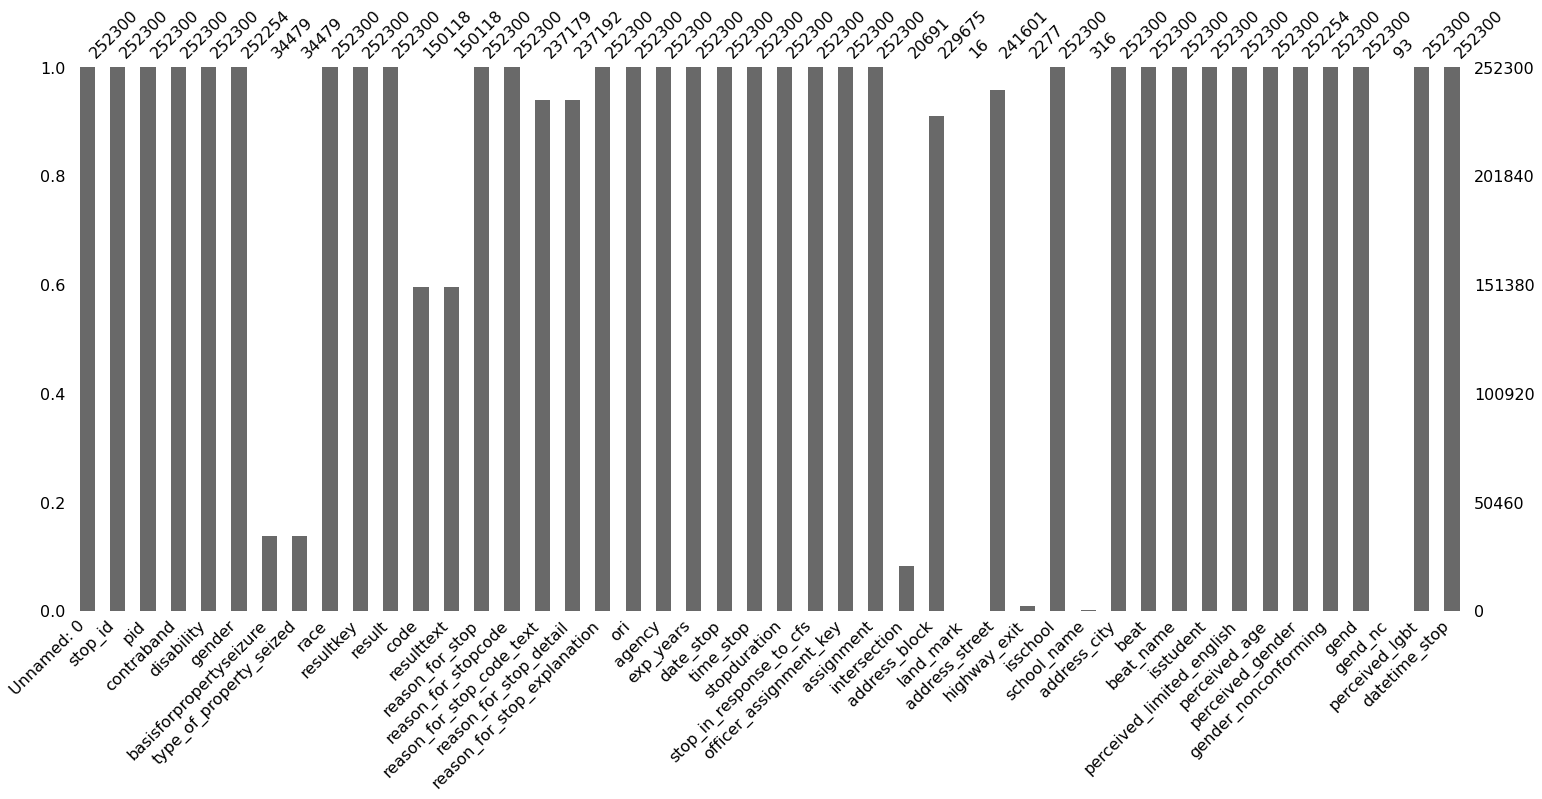

In [5]:
msno.bar(result_df)

#### Automated Keyword Parsing System

In [6]:
#goal: finding out the racial distribution of stops that were (likely to be) carried out on an unhoused person 
#step 1: filtering out stops that were likely to be unhoused individuals
#create df grouping by resulttext (penal code) to find 
#most common code violations that are potentially homelessness-related

In [7]:
resulttext_dist_df = result_df.groupby(['resulttext'], as_index=False).size()
resulttext_dist_df = resulttext_dist_df.sort_values(['size'], ascending=False)
resulttext_dist_df

,resulttext,size
1069,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,13028
389,22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,5670
57,11364(A) HS - POSS UNLAW PARAPHERNALIA (M) 35423,5077
442,23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,4926
373,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,4681
...,...,...
797,38026.5(B) VC - PROH OPR OFF RD VEH HWY (I) 54555,1
795,374.8(B) PC - DUMP HAZARD SUB:ROAD/WATR (F) 55129,1
794,374.7(A) PC - LITTER WATERS OR SHORE (M) 55119,1
793,374.4(B) PC - LIT:HEALTH/SAFETY/ETC HAZ (I) 55211,1


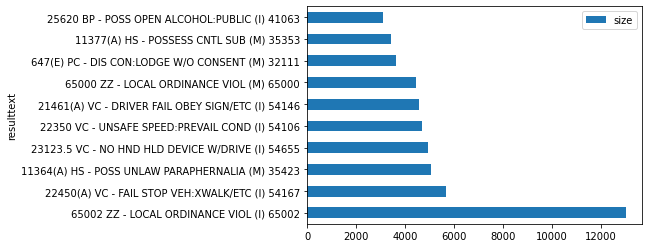

In [8]:
#sample plot of the 10 most common resulttexts 
temp = resulttext_dist_df.head(10)
temp.plot.barh(x="resulttext", y=["size"])
plt.show()

In [9]:
#dumping to excel to manually parse the data
#and search for keywords within the resulttexts that link with probable homelessness
import openpyxl
file_name = 'resulttext.xlsx'
resulttext_dist_df.to_excel(file_name)

In [10]:
result_keyword_bank = ['VIOL', 'POSS', 'TRESPASS', 'VEHICLE', 'LODG', 'ALC', 'CNTL SUB', 'SALE', 
                       'SUSPENDED', 'CONSENT', 'BURGLARY', 'PED', 'ENCR', 'BATTERY', 'NOISE', 'LOI',
                       'THEFT', 'ROBBERY', 'CRT ORDR']
result_keyword_bank

['VIOL',
 'POSS',
 'TRESPASS',
 'VEHICLE',
 'LODG',
 'ALC',
 'CNTL SUB',
 'SALE',
 'SUSPENDED',
 'CONSENT',
 'BURGLARY',
 'PED',
 'ENCR',
 'BATTERY',
 'NOISE',
 'LOI',
 'THEFT',
 'ROBBERY',
 'CRT ORDR']

In [11]:
#create a new df filtering out only those rows which contain the keywords above
pattern = '|'.join(result_keyword_bank)
resulttext_spec_df = resulttext_dist_df[resulttext_dist_df['resulttext'].str.contains(pattern)]

In [12]:
result_x = pd.merge(result_df, resulttext_spec_df, how="inner", on=["resulttext"])

In [13]:
result_x

,Unnamed: 0,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,...,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop,size
0,0,10000,1,None,None,Male,NaN,NaN,White,3,...,0,0,50,Male,0,1,NaN,No,2018-07-15 19:31:37,13028
1,11,100006,1,None,None,Female,NaN,NaN,White,3,...,0,0,27,Female,0,2,NaN,No,2019-02-03 09:11:13,13028
2,15,100009,1,None,None,Female,NaN,NaN,Hispanic/Latino/a,3,...,0,1,60,Female,0,2,NaN,No,2019-02-03 09:41:26,13028
3,17,100010,1,None,None,Male,NaN,NaN,White,3,...,0,0,45,Male,0,1,NaN,No,2019-02-03 09:44:37,13028
4,25,100017,1,None,None,Male,NaN,NaN,White,3,...,0,0,70,Male,0,1,NaN,No,2019-02-03 05:12:46,13028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72474,242999,254048,1,Other Contraband or evidence,None,Female,NaN,NaN,Hispanic/Latino/a,6,...,0,0,49,Female,0,2,NaN,No,2019-12-29 09:25:25,2
72475,247734,257048,1,None,None,Male,NaN,NaN,White,3,...,0,0,53,Male,0,1,NaN,No,2020-01-05 11:07:30,1
72476,248781,257727,1,None,None,Male,NaN,NaN,Asian,2,...,0,0,25,Male,0,1,NaN,No,2020-01-06 22:05:02,1
72477,250239,258737,1,None,None,Male,NaN,NaN,Hispanic/Latino/a,2,...,0,0,25,Male,0,1,NaN,No,2020-01-08 21:59:48,1


In [14]:
#breaking down + graphing racial distribution of these select set of stops
race_result_x =  result_x.groupby(['race'], as_index=False).size()
race_result_x['proportion'] = race_result_x['size']/race_result_x['size'].sum()

In [15]:
#proportionally, African-Americans make up 20% of these results (vs ~6% of the local population)
#definite disparity
race_result_x

,race,size,proportion
0,Asian,2412,0.033279
1,Black/African American,14652,0.202155
2,Hispanic/Latino/a,18423,0.254184
3,Middle Eastern or South Asian,1414,0.019509
4,Native American,150,0.002070
5,Pacific Islander,587,0.008099
6,White,34841,0.480705


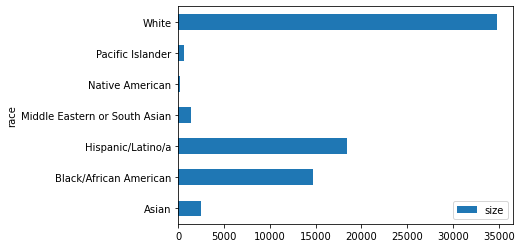

In [16]:
race_result_x.plot.barh(x="race", y=["size"])
plt.show()

In [17]:
#repeating the same process with the reason_for_stop_code_text column
detail_explanation = result_df[['reason_for_stop_code_text', 'reason_for_stop_explanation']]

In [18]:
detail_explanation

,reason_for_stop_code_text,reason_for_stop_explanation
0,22107 VC - UNSAF TURN &/OR NO SIGNAL (I) 54115,MOVEMENT
1,602 PC - TRESPASSING (M) 32022,SLEEPING IN FRONT OF BUS.
2,602 PC - TRESPASSING (M) 32022,SLEEPING IN FRONT OF BUS.
3,602 PC - TRESPASSING (M) 32022,SLEEPING IN FRONT OF BUS.
4,602 PC - TRESPASSING (M) 32022,SLEEPING IN FRONT OF BUS.
...,...,...
252295,21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,left turn without making stop sign. warning only
252296,24252(A) VC - FAIL MAINT VEH LITE EQUIP (I) 54109,No lights on bicycle at dark
252297,415(2) PC - LOUD/UNREASONABLE NOISE (I) 53130,matched description of suspect
252298,22107 VC - UNSAF TURN &/OR NO SIGNAL (I) 54115,unsafe lane change. warning only


In [19]:
reason_code = result_df.groupby(['reason_for_stop_code_text'], as_index=False).size()
reason_code = reason_code.sort_values(['size'], ascending=False)
reason_code

,reason_for_stop_code_text,size
1251,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,17033
1231,647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,11326
1159,602 PC - TRESPASSING (M) 32022,10606
1250,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000,10528
1289,NA - XX ZZ - COMMUNITY CARETAKING (X) 99990,8543
...,...,...
901,36 4.23(A)(1) US - FR:OPR VEHICLE UNDER INF (M...,1
1071,498(B)(2) PC - THEFT OF UTILITY SERVICES (M) 2...,1
357,21606(A)(4) BP - JNK DLR:FLS DESCRIPTION (M) 3...,1
671,25616 BP - FALSIFY RECORDS:SALES ALC (M) 41067,1


In [20]:
reason_code_spec_df = reason_code[reason_code['reason_for_stop_code_text'].str.contains(pattern)]

In [21]:
reason_x = pd.merge(result_df, reason_code_spec_df, how="inner", on=["reason_for_stop_code_text"])

In [22]:
reason_code_spec_df

,reason_for_stop_code_text,size
1251,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,17033
1231,647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,11326
1159,602 PC - TRESPASSING (M) 32022,10606
1250,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000,10528
1232,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,5847
...,...,...
665,25400(C)(4) PC - CCW PROHIB/UNLAWFUL POSS (F) ...,1
901,36 4.23(A)(1) US - FR:OPR VEHICLE UNDER INF (M...,1
1071,498(B)(2) PC - THEFT OF UTILITY SERVICES (M) 2...,1
671,25616 BP - FALSIFY RECORDS:SALES ALC (M) 41067,1


In [23]:
reason_x

,Unnamed: 0,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,...,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop,size
0,1,100000,1,None,None,Male,NaN,NaN,White,7,...,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47,10606
1,2,100000,1,None,None,Male,NaN,NaN,White,7,...,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47,10606
2,3,100000,2,None,None,Male,NaN,NaN,White,7,...,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47,10606
3,4,100000,2,None,None,Male,NaN,NaN,White,7,...,0,0,35,Male,0,1,NaN,No,2019-02-03 09:00:47,10606
4,26,100018,1,Suspected Stolen property,None,Male,Evidence,Suspected Stolen property,White,4,...,0,0,40,Male,0,1,NaN,No,2019-02-03 09:00:00,10606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107955,233659,247760,1,None,None,Male,NaN,NaN,White,2,...,0,0,70,Male,0,1,NaN,No,2019-12-15 15:05:42,1
107956,236150,249433,1,Cell phone(s) or electronic device(s),None,Female,NaN,NaN,Asian,7,...,0,0,35,Female,0,2,NaN,No,2019-12-19 07:54:26,1
107957,236452,249644,1,Drugs/narcotics,None,Male,Evidence,Drugs/narcotics,White,4,...,0,0,45,Male,0,1,NaN,No,2019-12-19 12:33:46,1
107958,244845,255271,1,None,None,Female,NaN,NaN,Hispanic/Latino/a,1,...,0,1,60,Female,0,2,NaN,No,2020-01-01 17:54:33,1


In [ ]:
file_name = 'reason_code.xlsx'
reason_x.to_excel(file_name, columns = ['reason_for_stop_detail', 'reason_for_stop_explanation'])

In [ ]:
#creating a dictionary of the most frequent words used in reason_for_stop_explanation for easy filtering of
#probable homelessness-related keywords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
reason_x = reason_x.replace(np.nan, '') 
explanation_list = reason_x['reason_for_stop_explanation'].tolist()
cv = CountVectorizer()
cv_fit = cv.fit_transform(explanation_list)
word_list = cv.get_feature_names_out()
count_list = cv_fit.toarray().sum(axis=0)

In [ ]:
count_dict = {'col_1':word_list, 'col_2':count_list}
count_dict

In [ ]:
count_dict_df = pd.DataFrame.from_dict(count_dict)

In [ ]:
count_dict_df.head(40)

In [ ]:
count_dict_df = count_dict_df.sort_values(['col_2'], ascending=False)

In [ ]:
file_name = 'probable_unhoused.xlsx'
count_dict_df.to_excel(file_name)

In [ ]:
#as previously, manually parse through the data to create a word bank of likely keywords
explanation_word_bank = ['sidewalk', 'sleep', 'encro', 'tres', 'park', 'loit', 'tent', 'block',
                        'influence', 'narc', 'camp', 'refus', 'sit', 'disturbance', 'welfare', 
                        'control', 'habit', 'illegal', 'resid', 'cart', 'shop', 'transient',
                        'yell', 'loud', 'casing', 'overnight', 'tamper', 'lay', 'burgl', 'theft', 'assault'
                        , 'rob']


In [ ]:
pattern2 = '|'.join(explanation_word_bank)

explanation_df = reason_x[reason_x['reason_for_stop_explanation'].str.contains(pattern2)]

In [ ]:
explanation_df

In [ ]:
explanation_race_df = explanation_df.groupby('race', as_index = False).size()

In [ ]:
explanation_race_df
explanation_race_df['proportion'] = explanation_race_df['size']/explanation_race_df['size'].sum()

In [ ]:
#exploring racial distribution of this new df containing only those entries with relevant keywords
#again, African-Americans consist of 23% of this group (vs ~6% local population)
explanation_race_df

In [ ]:
explanation_race_df.plot.barh(x="race", y=["size"])
plt.show()

In [ ]:
#finding the distribution of results of stops for the group that is probably unhoused
result_common = result_x.groupby('result', as_index = False).size()
print(result_common)

## still WIP (beats)

In [ ]:
beat_df = result_df.groupby(['beat', 'beat_name'], as_index = False).size()
beat_df = beat_df.sort_values(['size'], ascending=False)
beat_df

#### Geo-Location

In [139]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 17)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import shapely.geometry as shp
from shapely.geometry import Point
import contextily as ctx

In [24]:
# check the percentage of missing address data
print("The percentage of missing data in each address element are")
print(result_df[['intersection','address_block', 'land_mark', 'address_street', 'address_city']].isna().sum() / result_df.shape[0] * 100)

The percentage of missing data in each address element are
intersection      91.799049
address_block      8.967499
land_mark         99.993658
address_street     4.240587
address_city       0.000000
dtype: float64


In [25]:
print("The perecent of missing both address_block and intersection is") 
print(result_df[['address_block','intersection']].dropna(how = 'all').shape[0] / result_df.shape[0] * 100)

The perecent of missing both address_block and intersection is
99.0919540229885


In [26]:
result_df[['land_mark']].value_counts()

land_mark                        
North Cove Park Pacific beach        2
sr905 / i805                         1
sb 67 @ bradley ave                  1
park and ash                         1
glider port                          1
crown point                          1
SWEETWATER AT BRIARWOOD              1
STATE ROUTE-163/UNIVERSITY AVENUE    1
STATE ROUTE 94 EB AT 25TH            1
SD163 @ I-5                          1
SB I-15 @ AERO DRIVE                 1
ON TROLLEY IN SANTEE                 1
NB I-15 @ MIRA MESA BLVD             1
I15 / I8                             1
25th and market                      1
dtype: int64

In [ ]:
# construct a column of the full address of stops

In [107]:
keywords =  'habitation|habitating|inhabit|habitaion|647e|647\(e\)|647 e|647 \(e\)|lodging|lodged|54.0110|encroach|incroach|encroch|incroch'

these = result_df['reason_for_stop_explanation'].str.lower().str.contains(keywords).fillna(False)

df = result_df.loc[these]

In [108]:
t = df[['intersection','address_block', 'land_mark', 'address_street', 'address_city']]
t['address_block'] = t['address_block'].astype('Int64').astype(str)
t = t.astype(str).replace('<NA>', '').replace('nan', '')
t['full_address'] = t.apply(lambda x: ' '.join(x), axis=1)

<ipython-input-108-604937c05353>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['address_block'] = t['address_block'].astype('Int64').astype(str)


In [109]:
t

,intersection,address_block,land_mark,address_street,address_city,full_address
9,,200,,17th Street,SAN DIEGO,200 17th Street SAN DIEGO
10,,200,,17th Street,SAN DIEGO,200 17th Street SAN DIEGO
25,,2800,,North Mission Bay Drive,SAN DIEGO,2800 North Mission Bay Drive SAN DIEGO
36,,3900,,Morena Blvd,SAN DIEGO,3900 Morena Blvd SAN DIEGO
85,,3000,,INGRAHAM ST,SAN DIEGO,3000 INGRAHAM ST SAN DIEGO
...,...,...,...,...,...,...
251984,,1100,,4th avenue,SAN DIEGO,1100 4th avenue SAN DIEGO
251985,,1100,,4th avenue,SAN DIEGO,1100 4th avenue SAN DIEGO
251986,,1100,,4th avenue,SAN DIEGO,1100 4th avenue SAN DIEGO
252195,,200,,17TH STREET,SAN DIEGO,200 17TH STREET SAN DIEGO


In [28]:
# apply geocode to convert the full address into coordinates

In [110]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
t['geocodes'] = t['full_address'].apply(geolocator.geocode, country_codes='usa')

t['lat'] = t['geocodes'].apply(lambda x: x.latitude if x else None)
t['lon'] = t['geocodes'].apply(lambda x: x.longitude if x else None)

In [118]:
t[['lat']].isna().value_counts() / t.shape[0]

lat  
False    0.916311
True     0.083689
dtype: float64

In [113]:
t.to_csv('t.csv')

In [114]:
# get the gelocation of some big homeless encampment in San Diego

In [168]:
encamp = ["2500 Sports Arena Blvd San Diego", "2600 Sports Arena Blvd San Diego", "2700 Sports Arena Blvd San Diego",
         "16th street San Diego", "17th street San Diego", "Imperial street San Diego",
          "Market street San Diego", "G street San Diego"]

encamp_lon = []
encamp_lat = []
for x in encamp:
    encamp_lat.append(geolocator.geocode(x).latitude)
    encamp_lon.append(geolocator.geocode(x).longitude)
encamp_geo = [Point(xy) for xy in zip(encamp_lon, encamp_lat)]

In [46]:
# graph the encapment location

In [179]:
sd_map = gpd.read_file('san_diego_boundary_datasd.shp', bbox=None, mask=None, rows=None)
encamp_df = gpd.GeoDataFrame(geometry = encamp_geo)
sd_map

,geometry
0,"POLYGON ((6328112.751 1894696.276, 6328113.555..."
1,"POLYGON ((6470708.438 1829214.123, 6470142.888..."
2,"POLYGON ((6351603.135 1816566.962, 6351578.988..."
3,"POLYGON ((6351790.767 1800504.719, 6351742.153..."
4,"POLYGON ((6324784.990 1966279.998, 6324728.986..."


/Users/vikizhao/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/vikizhao/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


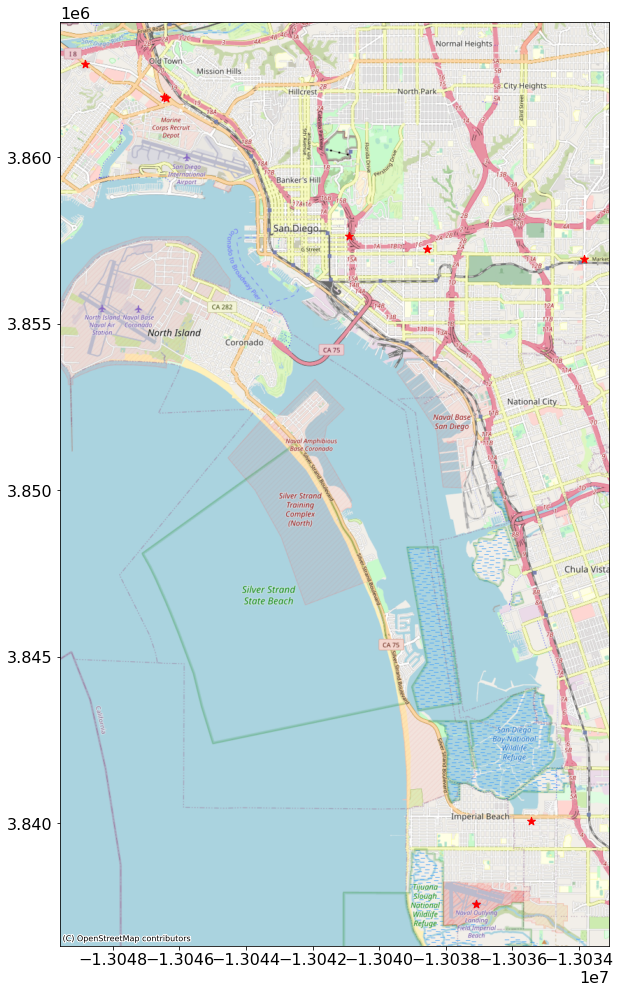

In [180]:
sd_map.crs = {'init':"epsg:4326"}
encamp_df.crs = {'init':"epsg:4326"}

sd_map = sd_map.to_crs(epsg=3857)
encamp_df = encamp_df.to_crs(epsg=3857)
ax = sd_map.plot(alpha=0.35, color='#d66058', zorder=1)
ax = gpd.GeoSeries(sd_map['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

ax = encamp_df.plot(ax = ax, markersize = 70, color = 'red',marker = '*',label = 'San Diego', zorder=3)
ctx.add_basemap(ax, crs=encamp_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [159]:
# calculate the distance and time of the route to each encampment

In [ ]:
from route import *

df = t
for i in range(len(encamp)):
    df = commute_time(df, str(i), dest[i], 'foot-walking')

In [ ]:
df

## References<a id='ref'></a>

1. <a id='ref1'></a> “Stopped by police in San Diego? A lot depends on where you live, drive”:https://www.sandiegouniontribune.com/news/watchdog/story/2022-01-16/stopped-by-police-in-san-diego-a-lot-depends-on-where-you-live-drive by Greg Moran, Lyndsay Winkley, Lauryn Schroeder, Cristina Byvik, and Michelle Gilchrist

2. <a id='ref2'></a>“The California Racial Justice Act & San Diego PD RIPA Data”:https://github.com/FleischerResearchLab/CRJA-analysis/blob/main/src/CRJA%20%2B%20SDPD%20Ripa%20Data.ipynb by Sreetama Chowdhury